# Lab 1 - Artificial neural network for cosinus

## Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1 - Tensorflow

In [11]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 
def sigmoid(x):
	return 1/(1+np.exp(-x))
 
# Caractéristiques du réseau
# -------------------------
ni = 3 # neurones en entrée
nh = 4 # 4 neurones sur la couche cachée
ns = 1 # 1 neurone en sortie
nd = 4 # 4 jeux de données
 
W = tf.Variable(tf.ones([ni, nh]))
b = tf.Variable(tf.ones([nh, nd]))
h = tf.Variable(tf.ones([nh, nd]))
a = tf.Variable(tf.ones([nd]))
o = tf.Variable(tf.ones([nd]))
Z = tf.Variable(tf.ones([nh, ns]))
b_hidden = tf.Variable(tf.zeros([nh, nd]))
b_sortie = tf.Variable(tf.zeros([ns, nd]))

x = tf.placeholder("float", [ni, nd])
t = tf.placeholder("float", [ns, nd])
 
# Calculs
W1_Transposee = tf.transpose(W)
M = tf.matmul(W1_Transposee, x)
b = tf.add(M,b_hidden)
h = tf.sigmoid(b)
 
Z_Transposee = tf.transpose(Z)
a = tf.add(tf.matmul(Z_Transposee, h),b_sortie)
o = tf.sigmoid(a)
 
erreur = tf.reduce_mean(tf.abs(tf.subtract(o,t)))
 
train_step = tf.train.AdadeltaOptimizer(learning_rate=1.0).minimize(erreur)
 
x_raw = np.array([ [0.0, 0.0, 1.0, 1.0],
                   [0.0, 1.0, 0.0, 1.0],
                   [1.0, 1.0, 1.0, 1.0]
                 ])
t_raw = np.array([0,0,1,1]).T
t_raw = np.reshape(t_raw,(1,4))

# affichage
normal_rv = tf.Variable( tf.truncated_normal([2,3],stddev = 0.1))
 
with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
 
	valeur = o.eval({x: x_raw})
	print("valeur avant apprentissage = ")
	print(valeur)
 
	for epoch in range(1000):
		k = sess.run(train_step,feed_dict={x: x_raw,t: t_raw})
 
	valeur = o.eval({x: x_raw})
	print("valeur obtenue apres apprentissage = ")
	print(valeur)
print ("fin")

valeur avant apprentissage = 
[[0.94903153 0.9713404  0.9713404  0.978338  ]]
valeur obtenue apres apprentissage = 
[[0.19880237 0.10237535 0.9687447  0.97122526]]
fin


In [13]:
import math
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 
def sigmoid(x):
	return 1/(1+np.exp(-x))
 
# Caractéristiques du réseau
# -------------------------
ni = 1		# neurone en entrée
nh1 = 10	# 10 neurones sur la couche cachée 1
nh2 = 5 	# 5 neurones sur la couche cachée 2
ns = 1		# 1 neurone en sortie
nd = 17		# 4 jeux de données


M = tf.Variable(tf.ones([ni, nh1]))
c = tf.Variable(tf.ones([nh1, nd]))
q = tf.Variable(tf.ones([nh1, nd]))
 
W = tf.Variable(tf.ones([nh1, nh2]))
b = tf.Variable(tf.ones([nh2, nd]))
h = tf.Variable(tf.ones([nh2, nd]))
Z = tf.Variable(tf.ones([nh2, ns]))
a = tf.Variable(tf.ones([nd]))
o = tf.Variable(tf.ones([nd]))
 
b_hidden1 = tf.Variable(tf.ones([nh1, nd]))
b_hidden2 = tf.Variable(tf.ones([nh2, nd]))
b_sortie = tf.Variable(tf.ones([ns, nd]))
 
x = tf.placeholder("float", [ni, nd])
t = tf.placeholder("float", [ns, nd])


M_Transposee = tf.transpose(M)
M_Multi = tf.matmul(M_Transposee, x)
c = tf.add(M_Multi,b_hidden1)
q = tf.sigmoid(c)
 
W1_Transposee = tf.transpose(W)
W_Multi = tf.matmul(W1_Transposee, q)
b = tf.add(W_Multi,b_hidden2)
h = tf.sigmoid(b)
 

Z_Multi = tf.matmul(tf.transpose(Z), h)
a = tf.add(Z_Multi,b_sortie)
o = 2*tf.sigmoid(a)-1


erreur = tf.reduce_mean(tf.abs(tf.subtract(o,t)))
 
train_step = tf.train.AdadeltaOptimizer(learning_rate=1.0).minimize(erreur)
 
x_raw = np.array([ [0.1, 0.2, 0.3, 0.4, 1.4, 1.5, 
                    2.8, 2.9, 3.0, 4.6, 4.7, 6.4, 6.5,
                    7.4, 7.5, 7.9, 9.0]])
x_raw = np.reshape(x_raw,(1,17))
 
t_raw = np.array([np.cos(0.1), np.cos(0.2), np.cos(0.3), np.cos(0.4),
                  np.cos(1.4), np.cos(1.5), np.cos(2.8), np.cos(2.9), np.cos(3.0), 
                  np.cos(4.6), np.cos(4.7), np.cos(6.4), np.cos(6.5), 
                  np.cos(7.4), np.cos(7.5), np.cos(7.9), np.cos(9.0)] ).T
t_raw = np.reshape(t_raw,(1,17))

# affichage
normal_rv = tf.Variable( tf.truncated_normal([2,3],stddev = 0.1))
 
with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
 
	valeur = o.eval({x: x_raw})
	print("valeur avant apprentissage = ")
	print(valeur)
 
	for epoch in range(10000):
		k = sess.run(train_step,feed_dict={x: x_raw,t: t_raw})
 
	valeur = o.eval({x: x_raw})

	# data = []
	# for x in x_raw:
	# 	data.append([x, o.eval(x), math.cos(x)])

	# print(data)
 
	print("valeur obtenue apres apprentissage = ")
	print(valeur)
 
print ("fin")

valeur avant apprentissage = 
[[0.9950497  0.99505055 0.99505126 0.99505174 0.99505377 0.9950539
  0.99505424 0.99505424 0.99505424 0.99505436 0.99505436 0.99505436
  0.99505436 0.99505436 0.99505436 0.99505436 0.99505436]]
valeur obtenue apres apprentissage = 
[[ 0.9953251   0.9814055   0.95829916  0.92651     0.20816076  0.09682012
  -0.94169766 -0.9708069  -0.98992026 -0.09578449  0.02011478  0.9936247
   0.97816014  0.4616195   0.38425517 -0.02721918 -0.9104103 ]]
fin


In [8]:

sns.lineplot(data=valeur, x="year", y="passengers")

/home/simon/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `year` for parameter `x`

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_9 (Dense)             (None, 15)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Train on 17 samples
Epoch 1/10000
17/17 [==============================] - 0s 3ms/sample - loss: 0.1589 - mean_squared_error: 0.1589
Epoch 2/10000
17/17 [==============================] - 0s 13

2023-03-01 11:23:10.572143: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_11/kernel/Assign' id:1873 op device:{requested: '', assigned: ''} def:{{{node dense_11/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_11/kernel, dense_11/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


17/17 [==============================] - 0s 206us/sample - loss: 0.1369 - mean_squared_error: 0.1369
Epoch 17/10000
17/17 [==============================] - 0s 193us/sample - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 18/10000
17/17 [==============================] - 0s 174us/sample - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 19/10000
17/17 [==============================] - 0s 744us/sample - loss: 0.1365 - mean_squared_error: 0.1365
Epoch 20/10000
17/17 [==============================] - 0s 198us/sample - loss: 0.1364 - mean_squared_error: 0.1364
Epoch 21/10000
17/17 [==============================] - 0s 241us/sample - loss: 0.1362 - mean_squared_error: 0.1362
Epoch 22/10000
17/17 [==============================] - 0s 220us/sample - loss: 0.1362 - mean_squared_error: 0.1362
Epoch 23/10000
17/17 [==============================] - 0s 205us/sample - loss: 0.1361 - mean_squared_error: 0.1361
Epoch 24/10000
17/17 [==============================] - 0s 201us/sample - loss: 0.1360 

/home/simon/.local/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-01 11:24:47.350055: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_11/Sigmoid' id:1884 op device:{requested: '', assigned: ''} def:{{{node dense_11/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_11/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


7.800 - 0.199 - 0.054
7.900 - 0.186 - -0.046
8.000 - 0.172 - -0.146
8.100 - 0.159 - -0.244
8.200 - 0.145 - -0.339
8.300 - 0.130 - -0.431
8.400 - 0.116 - -0.519
8.500 - 0.102 - -0.602
8.600 - 0.087 - -0.679
8.700 - 0.072 - -0.749
8.800 - 0.058 - -0.811
8.900 - 0.043 - -0.865
9.000 - 0.029 - -0.911
0.010213326101051197


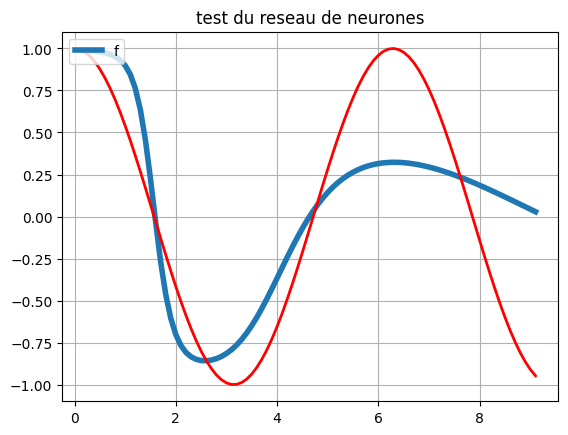

fin


In [18]:
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Activation, Dense
 
import matplotlib.pyplot as plt
 
def sigmoid(x):
	return 1/(1+np.exp(-x))
 
# les données d'apprentissage
x_raw = np.array([0.1, 0.2, 0.3, 0.4, 1.4, 1.5, 
							2.8, 2.9, 3.0, 4.6, 4.7, 6.4, 6.5,
							7.4, 7.5, 7.9, 9.0])
t_raw=(np.cos(x_raw)+1)/2.0




# affichage
normal_rv = tf.Variable( tf.truncated_normal([2,3],stddev = 0.1))
 
# le réseau
inputs = tf.keras.Input(shape=(1,)) # 1 nb entrées, 1 dimension
 
h1 = tf.keras.layers.Dense(15, activation=tf.sigmoid)(inputs)
h2 = tf.keras.layers.Dense(10, activation=tf.sigmoid)(h1)
outputs = tf.keras.layers.Dense(1, activation=tf.sigmoid)(h2)
mon_model = tf.keras.Model(inputs=inputs, outputs=outputs)
 
mon_model.summary()
 
# Apprentissage
mon_model.compile(optimizer=tf.train.GradientDescentOptimizer(0.25),
							loss='mse',
							metrics=['mse'])
mon_model.fit(x_raw, t_raw, epochs=10000, batch_size=17)


mon_fichier = open("fichier.txt", "w")
liste_y = []
liste_x = []
 
valeur = 0.1
erreur = 0
nb_valeur=0
 
while (valeur<9):
	nb_valeur = nb_valeur +1 
 
	x_essai2 = np.array([[valeur]])
	res = mon_model.predict(x_essai2,1,1)
	v = res[0]
 
	print('{0:.3f} - {1:.3f} - {2:.3f}'.format(valeur,2*v[0]-1,np.cos(valeur)))
	valeur = valeur + 0.1
	mon_fichier.write ('{0:.3f} {1:.3f} {2:.3f} \n'.format(valeur,2*v[0]-1,np.cos(valeur)))
 
	erreur = np.abs(np.cos(valeur)+2*v[0]-1)
 
	liste_y.append(2*v[0]-1);
	liste_x.append(valeur);
mon_fichier.close()


#--- erreur ---#
erreur = erreur/nb_valeur
print (erreur)
 
#--- dessin ---#
x = liste_x
y = liste_y
 
lines = plt.plot(x, y)
plt.setp(lines[0], linewidth=4)
 
lines_cos = plt.plot(x, np.cos(x))
plt.setp(lines_cos[0], linewidth=2, color='r')
 
plt.legend(('f'),loc='upper left') 
 
plt.title('test du reseau de neurones')
plt.grid(True)
plt.show()
 
print ("fin")